In [25]:
import numpy as np
from numpy import pi, inf

from tmm import coh_tmm                                # Module containing the transfer matrix module

import matplotlib.pyplot as plt
import pandas as pd

import os, glob

In [ ]:
plt.rcParams.update({'font.size': 14,
                     'axes.titlesize': 18,
                     'axes.labelsize': 18,
                     'axes.labelpad': 14,
                     'lines.linewidth': 3,
                     'lines.markersize': 10,
                     'xtick.labelsize' : 20,
                     'ytick.labelsize' : 20,
                     'xtick.top' : True,
                     'xtick.direction' : 'in',
                     'ytick.right' : True,
                     'ytick.direction' : 'in',})

The data for the complex refractive index for the metal, here chromium was taken from the web page https://refractiveindex.info/?shelf=main&book=Cr&page=Johnson, which bases on the data of the paper "Optical constants of transition metals: Ti, V, Cr, Mn, Fe, Co, Ni, and Pd" by Johnson and Christy.

## Comparing Gold and Chrome; metal surface of the sample is placed at the bottom 

In [2]:
objective_angle = 63.38         # [°], incident angle for 1.35 NA objective

In [3]:
# wavelength of incident laser
waveLength = 808e-9                         

# 1st layer
n1 = 1.33                                   # [1], refractive index of glass (and oil)

# Metal parameters
d = 30                                      # [nm], thickness of metal layer
# Complex refractive index for chrome
n_chrome = 3.1760                           # [1], real part of the complex refractive index of the metal
k_chrome = 3.4680                           # [1], extinction coefficient as imaginary part of the refractive index
                                            #      of the metal
# Complex refractive index for gold
n_gold = 0.15598                            # [1], real part of the complex refractive index of the metal
k_gold = 4.9741                             # [1], extinction coefficient as imaginary part of the refractive index
                                            #      of the metal

# 3rd layer
n3 = 1.33                                    # [1], refractive index of water

# Conversion of degree in radians
degree = pi/180

In [11]:
# Preparing the input lists for calculation
# List of considered thicknesses: dielectric 1 - metal - dielectric 2
d_list = [inf, d, inf]                               # [nm], thicknesses of the single layers 

# List of refractive indices of the single layers
n_chrome_list = [n1, n_chrome + k_chrome*1j, n3]     # [1], refractive indices of the single layers
n_gold_list = [n1, n_gold + k_gold*1j, n3]           # [1], refractive indices of the single layers

theta_list = np.linspace(0*degree, 90*degree, 300)   # [rad], list of incident angles

#---------------------------------------------------------------------------------------------------------------------#
# Calculating the absorption, transmission and reflection
R_chrome = np.array([])                                     # [1], reflection R for chrome
T_chrome = np.array([])                                     # [1], transmission T for chrome
A_chrome = np.array([])                                     # [1], absorption A for chrome
R_gold = np.array([])                                       # [1], reflection R for gold
T_gold = np.array([])                                       # [1], transmission T for gold
A_gold = np.array([])                                       # [1], absorption A for gold

# Syntax of the "coh_tmm"-function: - 'p': polarisation of incident light, here p polarisation, the rest is 
#                                        self-explanatory
#                                   - ['R']: just getting the values for reflection (transmission correspondingly: 'T')
for theta in theta_list:
    R_chrome = np.append(R_chrome, coh_tmm('p', n_chrome_list, d_list, theta, waveLength)['R'])
    T_chrome = np.append(T_chrome, coh_tmm('p', n_chrome_list, d_list, theta, waveLength)['T'])
    R_gold = np.append(R_gold, coh_tmm('p', n_gold_list, d_list, theta, waveLength)['R'])
    T_gold = np.append(T_gold, coh_tmm('p', n_gold_list, d_list, theta, waveLength)['T'])
    
A_chrome = 1 - R_chrome - T_chrome
A_gold = 1 - R_gold - T_gold

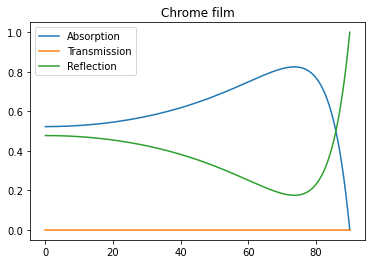

In [12]:
plt.plot(theta_list/degree,A_chrome,label='Absorption')
plt.plot(theta_list/degree,T_chrome,label='Transmission')
plt.plot(theta_list/degree,R_chrome,label='Reflection')
plt.title('Chrome film')
plt.legend()

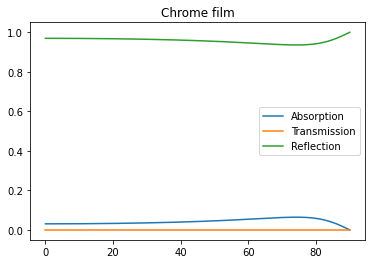

In [13]:
plt.plot(theta_list/degree,A_gold,label='Absorption')
plt.plot(theta_list/degree,T_gold,label='Transmission')
plt.plot(theta_list/degree,R_gold,label='Reflection')
plt.title('Gold film')
plt.legend()

## At 532nm 

In [17]:
# wavelength of incident laser
waveLength = 532e-9                         

# 1st layer
n1 = 1.33                                   # [1], refractive index of glass (and oil)

# Metal parameters
d = 30                                      # [nm], thickness of metal layer
# Complex refractive index for chrome
n_chrome = 3.03                         # [1], real part of the complex refractive index of the metal
k_chrome = 3.33                           # [1], extinction coefficient as imaginary part of the refractive index
                                            #      of the metal
# Complex refractive index for gold
n_gold = 0.54                      # [1], real part of the complex refractive index of the metal
k_gold = 2.23                             # [1], extinction coefficient as imaginary part of the refractive index
                                            #      of the metal

# 3rd layer
n3 = 1.33                                    # [1], refractive index of water

# Conversion of degree in radians
degree = pi/180


# Preparing the input lists for calculation
# List of considered thicknesses: dielectric 1 - metal - dielectric 2
d_list = [inf, d, inf]                               # [nm], thicknesses of the single layers 

# List of refractive indices of the single layers
n_chrome_list = [n1, n_chrome + k_chrome*1j, n3]     # [1], refractive indices of the single layers
n_gold_list = [n1, n_gold + k_gold*1j, n3]           # [1], refractive indices of the single layers

theta_list = np.linspace(0*degree, 90*degree, 300)   # [rad], list of incident angles

#---------------------------------------------------------------------------------------------------------------------#
# Calculating the absorption, transmission and reflection
R_chrome = np.array([])                                     # [1], reflection R for chrome
T_chrome = np.array([])                                     # [1], transmission T for chrome
A_chrome = np.array([])                                     # [1], absorption A for chrome
R_gold = np.array([])                                       # [1], reflection R for gold
T_gold = np.array([])                                       # [1], transmission T for gold
A_gold = np.array([])                                       # [1], absorption A for gold

# Syntax of the "coh_tmm"-function: - 'p': polarisation of incident light, here p polarisation, the rest is 
#                                        self-explanatory
#                                   - ['R']: just getting the values for reflection (transmission correspondingly: 'T')
for theta in theta_list:
    R_chrome = np.append(R_chrome, coh_tmm('p', n_chrome_list, d_list, theta, waveLength)['R'])
    T_chrome = np.append(T_chrome, coh_tmm('p', n_chrome_list, d_list, theta, waveLength)['T'])
    R_gold = np.append(R_gold, coh_tmm('p', n_gold_list, d_list, theta, waveLength)['R'])
    T_gold = np.append(T_gold, coh_tmm('p', n_gold_list, d_list, theta, waveLength)['T'])
    
A_chrome = 1 - R_chrome - T_chrome
A_gold = 1 - R_gold - T_gold

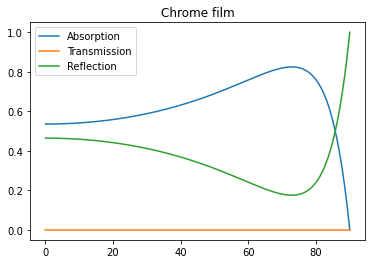

In [19]:
plt.plot(theta_list/degree,A_chrome,label='Absorption')
plt.plot(theta_list/degree,T_chrome,label='Transmission')
plt.plot(theta_list/degree,R_chrome,label='Reflection')
plt.title('Chrome film')
plt.legend()

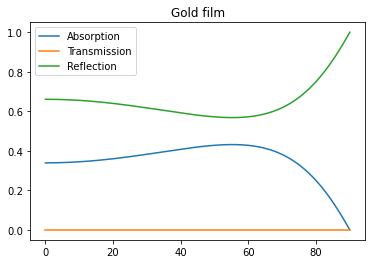

In [21]:
plt.plot(theta_list/degree,A_gold,label='Absorption')
plt.plot(theta_list/degree,T_gold,label='Transmission')
plt.plot(theta_list/degree,R_gold,label='Reflection')
plt.title('Gold film')
plt.legend()

## Computing spectra for visible light  

In [41]:
#loading data
RI_gold = pd.read_csv('gold-Johnson.csv')
RI_chrome = pd.read_csv('chrome-Johnson.csv')
RI_gold.head() #wavelength is in micrometer scale

### For 50nm Gold film

In [77]:
RI_gold = pd.read_csv('gold-Johnson.csv')

# wavelength of incident laser
waveLength = RI_gold.wl
waveLength = waveLength.to_numpy()
waveLength = waveLength*1e3 #to convert wavelength to um scale (required for the tmm module)

# 1st layer
n1 = 1.51                                   # [1], refractive index of glass (and oil)

# Metal parameters
d = 50                                      # [nm], thickness of metal layer

# Complex refractive index for gold
n_gold = RI_gold.n                      # [1], real part of the complex refractive index of the metal
n_gold = n_gold.to_numpy()
k_gold = RI_gold.k                             # [1], extinction coefficient as imaginary part of the refractive index
k_gold = k_gold.to_numpy()

# 3rd layer
n3 = 1.33                                    # [1], refractive index of water

# Conversion of degree in radians
degree = pi/180


# Preparing the input lists for calculation
# List of considered thicknesses: dielectric 1 - metal - dielectric 2
d_list = [inf, d, inf]                               # [nm], thicknesses of the single layers 

# List of refractive indices of the single layers
#n_gold_list = [n1, n_gold + k_gold*1j, n3]           # [1], refractive indices of the single layers

#theta_list = np.linspace(0*degree, 90*degree, 300)   # [rad], list of incident angles

#theta = 52.62*degree #in radian
theta = 0*degree #in radian #normal incidence is considered

#---------------------------------------------------------------------------------------------------------------------#
# Calculating the reflection, transmission and absorption
R_gold = np.array([])                                       
T_gold = np.array([])                                       
A_gold = np.array([])                                       

# Syntax of the "coh_tmm"-function: - 'p': polarisation of incident light, here p polarisation, the rest is 
#                                        self-explanatory
#                                   - ['R']: just getting the values for reflection (transmission correspondingly: 'T')
for i in range(len(waveLength)):
    R_gold = np.append(R_gold, coh_tmm('p', [n1,(n_gold[i]+(k_gold[i]*1j)),n3], d_list, theta, waveLength[i])['R'])
    T_gold = np.append(T_gold, coh_tmm('p', [n1,(n_gold[i]+(k_gold[i]*1j)),n3], d_list, theta, waveLength[i])['T'])
    
A_gold = 1 - R_gold - T_gold

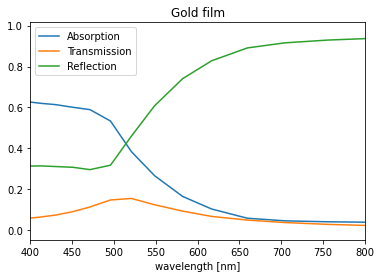

In [78]:
plt.plot(waveLength,A_gold,label='Absorption')
plt.plot(waveLength,T_gold,label='Transmission')
plt.plot(waveLength,R_gold,label='Reflection')
plt.xlabel('wavelength [nm]')
plt.title('Gold film')
plt.xlim(400,800)
plt.legend()

### For 30nm Gold film

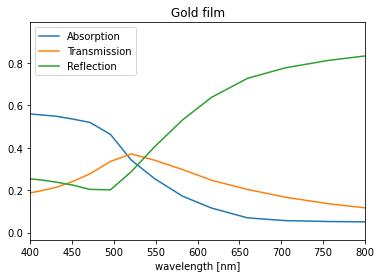

In [80]:
RI_gold = pd.read_csv('gold-Johnson.csv')

# wavelength of incident laser
waveLength = RI_gold.wl
waveLength = waveLength.to_numpy()
waveLength = waveLength*1e3

# 1st layer
n1 = 1.51                                   # [1], refractive index of glass (and oil)

# Metal parameters
d = 30                                      # [nm], thickness of metal layer

# Complex refractive index for gold
n_gold = RI_gold.n                      # [1], real part of the complex refractive index of the metal
n_gold = n_gold.to_numpy()
k_gold = RI_gold.k                             # [1], extinction coefficient as imaginary part of the refractive index
k_gold = k_gold.to_numpy()

# 3rd layer
n3 = 1.33                                    # [1], refractive index of water

# Conversion of degree in radians
degree = pi/180


# Preparing the input lists for calculation
# List of considered thicknesses: dielectric 1 - metal - dielectric 2
d_list = [inf, d, inf]                               # [nm], thicknesses of the single layers 

# List of refractive indices of the single layers
#n_gold_list = [n1, n_gold + k_gold*1j, n3]           # [1], refractive indices of the single layers

#theta_list = np.linspace(0*degree, 90*degree, 300)   # [rad], list of incident angles

#theta = 52.62*degree #in radian
theta = 0*degree #in radian

#---------------------------------------------------------------------------------------------------------------------#
# Calculating the absorption, transmission and reflection
R_gold = np.array([])                                       # [1], reflection R for gold
T_gold = np.array([])                                       # [1], transmission T for gold
A_gold = np.array([])                                       # [1], absorption A for gold

# Syntax of the "coh_tmm"-function: - 'p': polarisation of incident light, here p polarisation, the rest is 
#                                        self-explanatory
#                                   - ['R']: just getting the values for reflection (transmission correspondingly: 'T')
for i in range(len(waveLength)):
    R_gold = np.append(R_gold, coh_tmm('p', [n1,(n_gold[i]+(k_gold[i]*1j)),n3], d_list, theta, waveLength[i])['R'])
    T_gold = np.append(T_gold, coh_tmm('p', [n1,(n_gold[i]+(k_gold[i]*1j)),n3], d_list, theta, waveLength[i])['T'])
    
A_gold = 1 - R_gold - T_gold

plt.plot(waveLength,A_gold,label='Absorption')
plt.plot(waveLength,T_gold,label='Transmission')
plt.plot(waveLength,R_gold,label='Reflection')
plt.xlabel('wavelength [nm]')
plt.title('Gold film')
plt.xlim(400,800)
plt.legend()

### For 30nm Chrome film

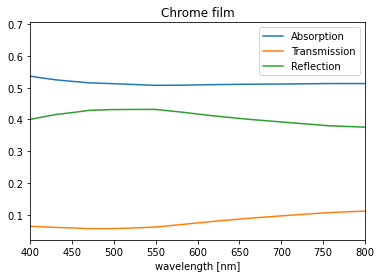

In [82]:
RI_chrome = pd.read_csv('chrome-Johnson.csv')

# wavelength of incident laser
waveLength = RI_chrome.wl
waveLength = waveLength.to_numpy()
waveLength = waveLength*1e3

# 1st layer
n1 = 1.51                                   # [1], refractive index of glass (and oil)

# Metal parameters
d = 30                                      # [nm], thickness of metal layer

# Complex refractive index for gold
n_chrome = RI_chrome.n                      # [1], real part of the complex refractive index of the metal
n_chrome = n_chrome.to_numpy()
k_chrome = RI_chrome.k                             # [1], extinction coefficient as imaginary part of the refractive index
k_chrome = k_chrome.to_numpy()

# 3rd layer
n3 = 1.33                                    # [1], refractive index of water

# Conversion of degree in radians
degree = pi/180


# Preparing the input lists for calculation
# List of considered thicknesses: dielectric 1 - metal - dielectric 2
d_list = [inf, d, inf]                               # [nm], thicknesses of the single layers 

# List of refractive indices of the single layers
#n_gold_list = [n1, n_gold + k_gold*1j, n3]           # [1], refractive indices of the single layers

#theta_list = np.linspace(0*degree, 90*degree, 300)   # [rad], list of incident angles

#theta = 52.62*degree #in radian
theta = 0*degree #in radian

#---------------------------------------------------------------------------------------------------------------------#
# Calculating the absorption, transmission and reflection
R_chrome = np.array([])                                       # [1], reflection R for gold
T_chrome = np.array([])                                       # [1], transmission T for gold
A_chrome = np.array([])                                       # [1], absorption A for gold

# Syntax of the "coh_tmm"-function: - 'p': polarisation of incident light, here p polarisation, the rest is 
#                                        self-explanatory
#                                   - ['R']: just getting the values for reflection (transmission correspondingly: 'T')
for i in range(len(waveLength)):
    R_chrome = np.append(R_chrome, coh_tmm('p', [n1,(n_chrome[i]+(k_chrome[i]*1j)),n3], d_list, theta, waveLength[i])['R'])
    T_chrome = np.append(T_chrome, coh_tmm('p', [n1,(n_chrome[i]+(k_chrome[i]*1j)),n3], d_list, theta, waveLength[i])['T'])
    
A_chrome = 1 - R_chrome - T_chrome

plt.plot(waveLength,A_chrome,label='Absorption')
plt.plot(waveLength,T_chrome,label='Transmission')
plt.plot(waveLength,R_chrome,label='Reflection')
plt.xlabel('wavelength [nm]')
plt.title('Chrome film')
plt.xlim(400,800)
plt.legend()

## For 30nm gold and 5nm Chrome adhesion layer

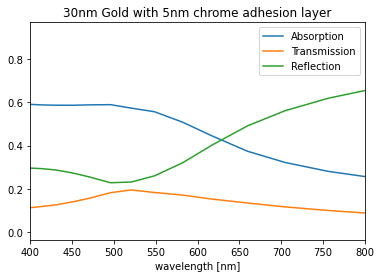

In [85]:
RI_gold = pd.read_csv('gold-Johnson.csv')
RI_chrome = pd.read_csv('chrome-Johnson.csv')

# wavelength of incident laser
waveLength = RI_gold.wl
waveLength = waveLength.to_numpy()
waveLength = waveLength*1e3

# 1st layer
n1 = 1.51                                   # [1], refractive index of glass (and oil)

# Metal parameters
d1 = 5                                      # [nm], thickness of chrome adhesion layer
d2 = 30                                     #thickness of gold layer

n_gold = RI_gold.n                      
n_gold = n_gold.to_numpy()
k_gold = RI_gold.k                             
k_gold = k_gold.to_numpy()

n_chrome = RI_chrome.n                      
n_chrome = n_chrome.to_numpy()
k_chrome = RI_chrome.k                             
k_chrome = k_chrome.to_numpy()

# 3rd layer
n3 = 1.33                                    # [1], refractive index of water

# Conversion of degree in radians
degree = pi/180


# Preparing the input lists for calculation
# List of considered thicknesses: dielectric 1 - metal - dielectric 2
d_list = [inf, d1,d2, inf]                               # [nm], thicknesses of the single layers 

# List of refractive indices of the single layers
#n_gold_list = [n1, n_gold + k_gold*1j, n3]           # [1], refractive indices of the single layers

#theta_list = np.linspace(0*degree, 90*degree, 300)   # [rad], list of incident angles

#theta = 52.62*degree #in radian
theta = 0*degree #in radian

#---------------------------------------------------------------------------------------------------------------------#
# Calculating the absorption, transmission and reflection
R_film = np.array([])                                       # [1], reflection R for gold
T_film = np.array([])                                       # [1], transmission T for gold
A_film = np.array([])                                       # [1], absorption A for gold

# Syntax of the "coh_tmm"-function: - 'p': polarisation of incident light, here p polarisation, the rest is 
#                                        self-explanatory
#                                   - ['R']: just getting the values for reflection (transmission correspondingly: 'T')
for i in range(len(waveLength)):
    R_film = np.append(R_film, coh_tmm('p', [n1,(n_chrome[i]+(k_chrome[i]*1j)),(n_gold[i]+(k_gold[i]*1j)),n3], d_list, theta, waveLength[i])['R'])
    T_film = np.append(T_film, coh_tmm('p', [n1,(n_chrome[i]+(k_chrome[i]*1j)),(n_gold[i]+(k_gold[i]*1j)),n3], d_list, theta, waveLength[i])['T'])
    
A_film = 1 - R_film - T_film

plt.plot(waveLength,A_film,label='Absorption')
plt.plot(waveLength,T_film,label='Transmission')
plt.plot(waveLength,R_film,label='Reflection')
plt.xlabel('wavelength [nm]')
plt.title('30nm Gold with 5nm chrome adhesion layer')
plt.xlim(400,800)
plt.legend()

From the above calculations it can be seen that gold films transmit more light in the visible spectrum compared to chrome films. 
And reducing the thickness of the gold film from 50nm to 30nm will also help for better imaging